<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/Boys_and_Girls_Classification_inceptionnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/data/Sample Dataset.zip'
# Specify the directory where you want to extract the contents
extraction_path = '/content/sample_dataset'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Unzipping completed!")

Unzipping completed!


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load images from a folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

# Set up paths to your image folders
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'

# Load images
boys_images = load_images_from_folder(boys_folder_path)
girls_images = load_images_from_folder(girls_folder_path)

# Display the number of images loaded
print(f'Loaded {len(boys_images)} boys images and {len(girls_images)} girls images.')

Loaded 106 boys images and 106 girls images.


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 86s 14s/step - accuracy: 0.6383 - loss: 0.6355 - val_accuracy: 0.6047 - val_loss: 0.5837
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 64s 9s/step - accuracy: 0.7645 - loss: 0.5186 - val_accuracy: 0.8140 - val_loss: 0.4483
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 60s 10s/step - accuracy: 0.8954 - loss: 0.4421 - val_accuracy: 0.8372 - val_loss: 0.3884
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 81s 9s/step - accuracy: 0.8936 - loss: 0.4011 - val_accuracy: 0.8605 - val_loss: 0.3533
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 66s 11s/step - accuracy: 0.8890 - loss: 0.3673 - val_accuracy: 0.8372 - val_loss: 0.3668
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.8715 - loss: 0.3242 - val_accuracy: 0.8837 - val_loss: 0.3178
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 61s 10s/step - accuracy: 0.9474 - loss: 0.2586 - val_accuracy: 0.9302 - val_loss: 0.2524
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 69s 11s/step - accuracy: 0.9700 - loss: 0.2264 - val_accuracy: 0.8837 - val_loss: 0.2550
Epoch 9/10
6/

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9586 - loss: 0.1936
Validation Accuracy: 0.9535


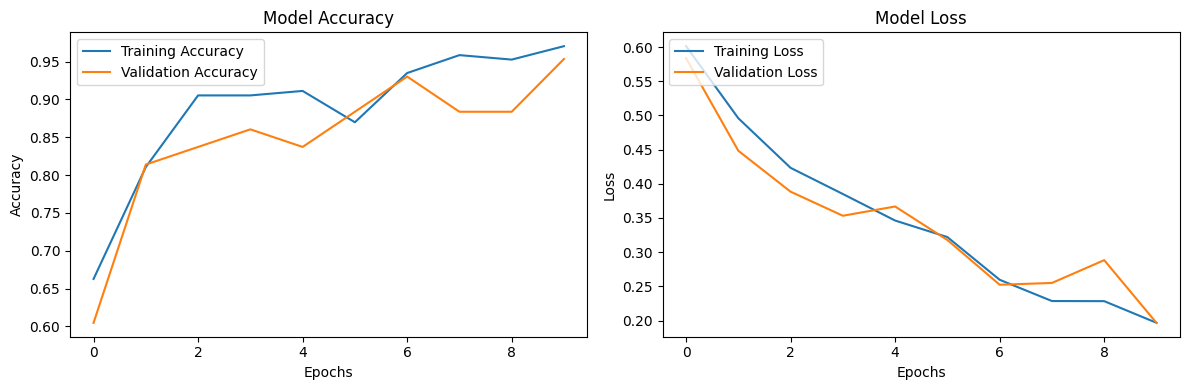

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Function to load images and assign labels
def load_images_with_labels(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (299, 299))  # Resize to match InceptionV3 input size
            images.append(img)
            labels.append(label)
    return images, labels

# Set up paths to your image folders
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'

# Load images and assign labels
boys_images, boys_labels = load_images_with_labels(boys_folder_path, 0)  # Label for boys is 0
girls_images, girls_labels = load_images_with_labels(girls_folder_path, 1)  # Label for girls is 1

# Combine boys and girls data
images = np.array(boys_images + girls_images)
labels = np.array(boys_labels + girls_labels)

# Normalize the image data to the range [0, 1]
images = images / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=2)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Set up the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model's layers
base_model.trainable = False

# Add custom layers on top of InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 2 classes (boys and girls)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator()

# Train the model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=val_datagen.flow(X_val, y_val),
    epochs=10  # You can increase the number of epochs for better results
)

# Save the model
model.save('/content/drive/MyDrive/Inception_boys_girls_classifier.h5')

# Evaluate the model
loss, accuracy = model.evaluate(val_datagen.flow(X_val, y_val))
print(f'Validation Accuracy: {accuracy:.4f}')



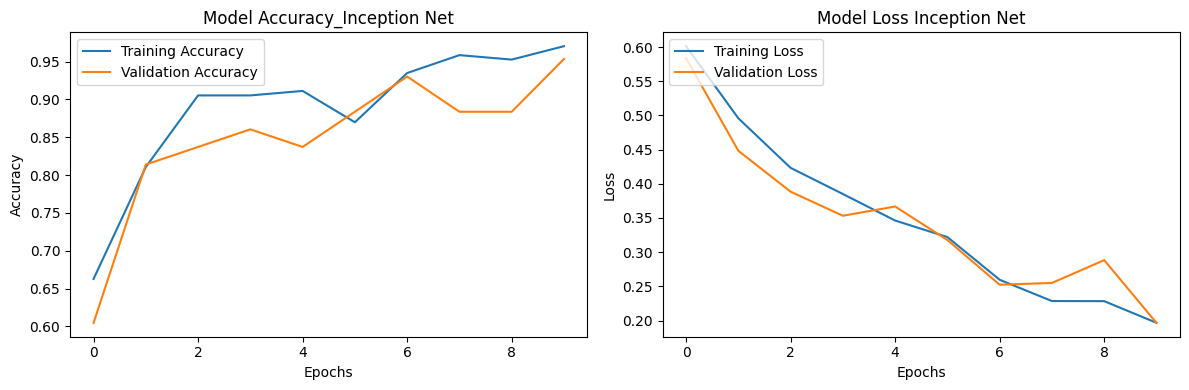

In [ ]:
# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy_Inception Net')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

# Plot training & validation loss values
def plot_loss(history):
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Inception Net')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

# Generate the plots
plot_accuracy(history)
plot_loss(history)
plt.tight_layout()
plt.show()
